![igfam.jpg](igfam.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import norm
from IPython.display import Markdown, display

from IPython.display import display, HTML, Latex
display(HTML("<style>.container { width:85% !important; }</style>"))

%matplotlib inline

## Get Some Data!
* Where to get data
* What to look for in data
* Is it important?

In [2]:
def get_data():
    df = pd.read_csv("survey_results_slim.csv")
    df = df.dropna(subset=["Salary"]).copy()
    return df

df = get_data()

## Dataset Info
* Columns
* Size
* Start Getting _Ideas_


In [3]:
columns = list(df)
print(columns[0:5])
length = len(df)
print(df["Salary"][0:5])

['Professional', 'ProgramHobby', 'Country', 'University', 'EmploymentStatus']
2     113750.0
14    100000.0
17    130000.0
18     82500.0
22    100764.0
Name: Salary, dtype: float64


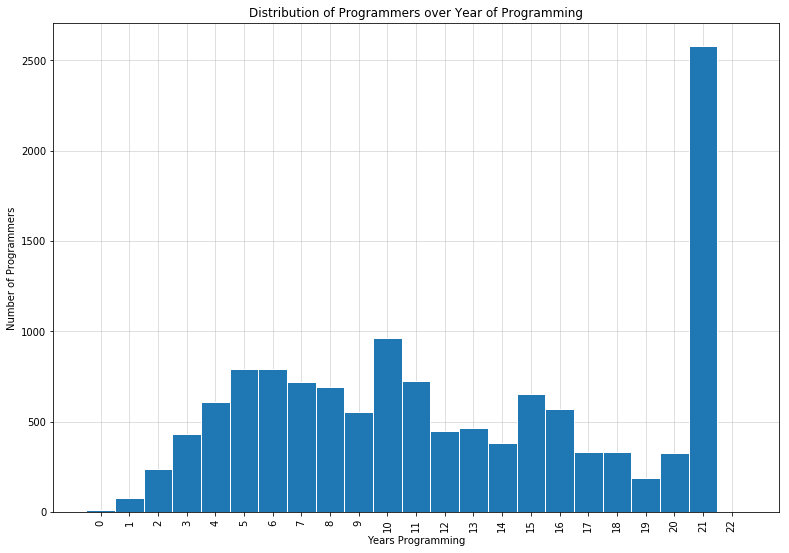

In [4]:
def make_hist(data, title="Title_Placeholder", xlabel="xlabel_Placeholder", ylabel="ylabel_Placeholder"):
    bins = len(set(data))+1
    fig, ax = plt.subplots(figsize=(13,9))
    ax.hist(data, bins=bins, align='left', range=(0,bins), edgecolor="white")
    ax.grid(alpha=0.5)
    ax.set_axisbelow(True)
    plt.xticks(rotation=90)
    ax.set_xticks(range(0, bins))
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()
    
make_hist(df['YearsProgram'], "Distribution of Programmers over Year of Programming", "Years Programming", "Number of Programmers")

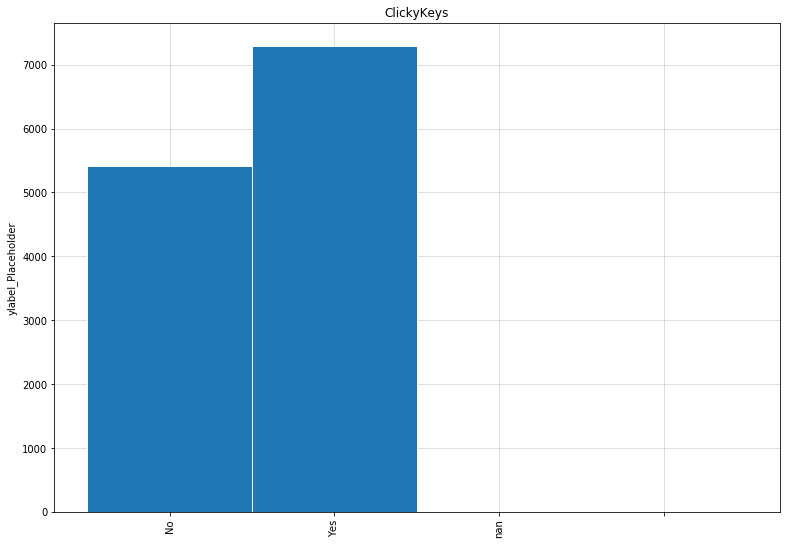

In [5]:
column = "ClickyKeys"
make_hist(df[column], title=column, xlabel="")

In [6]:
print("Clicky keys salary:", df.loc[df["ClickyKeys"] == "Yes"]["Salary"].mean())
print("No clicky keys salary:", df.loc[df["ClickyKeys"] == "No"]["Salary"].mean())

Clicky keys salary: 56595.78196684976
No clicky keys salary: 56239.59610183224


In [7]:
print("The right way salary:", df.loc[df["PronounceGIF"] == 'With a hard "g," like "gift"']["Salary"].mean())
print("The wrong way salary:", df.loc[df["PronounceGIF"] == 'With a soft "g," like "jiff"']["Salary"].mean())

The right way salary: 57578.96229224571
The wrong way salary: 57056.27510153962


In [8]:
print(set(df["TabsSpaces"]))

{nan, 'Spaces', 'Tabs', 'Both'}


In [9]:
print("Tabs salary:", df.loc[df["TabsSpaces"] == 'Tabs']["Salary"].mean())
print("Spaces salary:", df.loc[df["TabsSpaces"] == 'Spaces']["Salary"].mean())
print("Both salary:", df.loc[df["TabsSpaces"] == 'Both']["Salary"].mean())

Tabs salary: 49680.68101741523
Spaces salary: 65540.3040558787
Both salary: 50240.20998933888


### [30 points] Problem 2: Gender Balance in Movements Between Academic Disciplines
***

Every year, the online academic resume service, ORCID, dumps the data from all of the professors who have their privacy settings set to “public” so that the research community can learn about the makeup of the academic workforce. In this real-data problem, we’re going to study the flows of professors between different academic fields to learn about gender differences. We’ll use a pre-processed dataset used by actual researchers studying gender imbalance across fields.

First, some information about the data. For each of the 1.6 million professors in the public ORCID data dump, the researchers determined (a) what field they are currently in, (b) what field they did their PhD in, and (c) their gender. Here, because the goal of the study was originally to learn about disparities between men and women, gender was coded by the researchers as male or female, as indicated by the professors. Those who chose not to mark their gender as public were not included in the processed dataset.

The researchers have provided CSCI 3022 with two files: **totals.csv** and **switch_edgelist.csv**. The first file enumerates the total numbers of men and women in each of $30$ different fields. The second file enumerates the total numbers of men and women who switched from one field to another field during their career.

The null hypothesis about the data is that the gender balance of people leaving field $X$ is the same as the gender balance in field $X$. For example, if Anthropology is $50\%$ women and $50\%$ men, we expect people who have moved from Anthropology to another field to reflect this $50/50$ balance. On the other hand, if Physics is only $15\%$ women and $85\%$ men, we expect people who have moved from Physics to another field to reflect a $15/85$ balance.

In symbolic form, we might write this as follows. Let the proportion of professors in field i who are women be given by $p_i$, and let the proportion of women who move from field i to some other field be given by $q_i$. Then the expected result is that $p_i$ = $q_i$. The researchers are interested to know if there is statistical evidence that $p_i \neq q_i$ for any of the fields $i$.

**Part A**: Wrangle those data files. Then, make a plot of $p_i$ for all $i = 1, 2, \ldots, 30$ fields using a green color, and on the same axes, plot $q_i$ using a blue color.

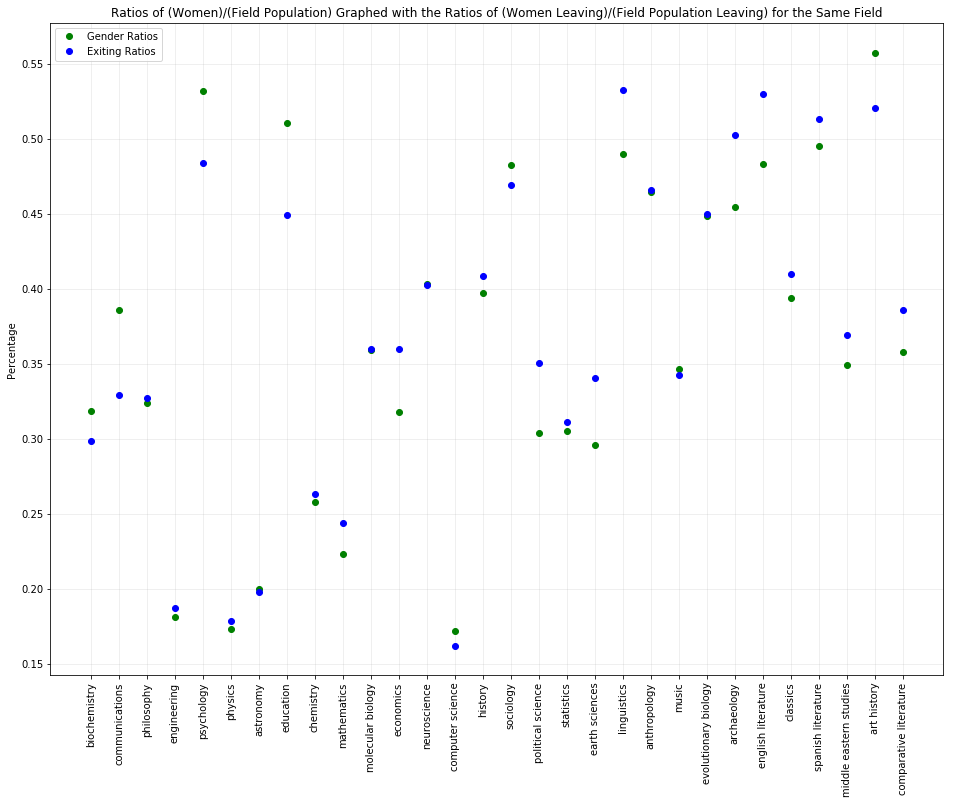

In [10]:
def two_a(ret, graph):
    totals = pd.read_csv("totals.csv")
    edge_list = pd.read_csv("switch_edgelist.csv")
    
    # First we want to get the unique fields
    unique_fields = totals.field.unique()
    
    # Set up information containers
    gender_ratios = []
    retention_ratios = []
    gender_populations = []
    retention_populations = []
    
    for field in unique_fields:
        # Select the male count in the given field
        males_in_field = totals[totals["field"] == field].loc[totals["gend_cat"] == "male"]["N"].item()
        # Select the female count in the given field
        females_in_field = totals[totals["field"] == field].loc[totals["gend_cat"] == "female"]["N"].item()
        # Get the sum of the counts
        total = males_in_field + females_in_field
        # Log the total of the population
        gender_populations.append(total)
        # Log the ratio of females to population
        gender_ratios.append(females_in_field/total)
        
    for field in unique_fields:
        females_left = 0
        males_left = 0
        # Since there can be more than one link from the given field, we need to iterate through all of them
        for entry in edge_list[edge_list["from"] == field].loc[edge_list["gend_cat"] == "female"]["N"].items():
            # Get the running sum of females who left from that field (doesn't matter which field they went to)
            females_left += entry[1]
        # Since there can be more than one link from the given field, we need to iterate through all of them
        for entry in edge_list[edge_list["from"] == field].loc[edge_list["gend_cat"] == "male"]["N"].items():
            # Get the running sum of males who left from that field (doesn't matter which field they went to)
            males_left += entry[1]
        # Get the sum of populations
        total = males_left + females_left
        # Log the total of the population
        retention_populations.append(total)
        # Log the ratio of females to population
        retention_ratios.append(females_left/total)
    
    if graph:
        # Do Graph Stuff
        fig, ax = plt.subplots(figsize=(16,12))
        ax.plot(range(1,31), gender_ratios, 'o', label="Gender Ratios", color="green")
        ax.plot(range(1,31), retention_ratios, 'o', label="Exiting Ratios", color="blue")

        ax.grid(alpha=0.25)
        plt.xticks(range(1,31), unique_fields, rotation='vertical')
        ax.set_axisbelow(True)
        ax.legend()
        ax.set_title("Ratios of (Women)/(Field Population) Graphed with the Ratios of (Women Leaving)/(Field Population Leaving) for the Same Field")
        ax.set_ylabel("Percentage")
        plt.show()
    
    if ret:
        return gender_ratios, retention_ratios, gender_populations, retention_populations, unique_fields

two_a(ret=False, graph=True)

**Part B**: At the $\alpha = 0.05$ significance level, use the method of your choice to determine whether there is sufficient evidence that $p_i \neq q_i$. Be sure to explain why you are justified in using the method that you used, and report the numbers that helped you make your decision for each of the fields. Please use only methods we have discussed in class. Then, replicate your plot from **Part A** and add a red symbol to those fields, if any, where $p_i$ and $q_i$ are statistically different at the given significance level. Comment on any significant findings.  

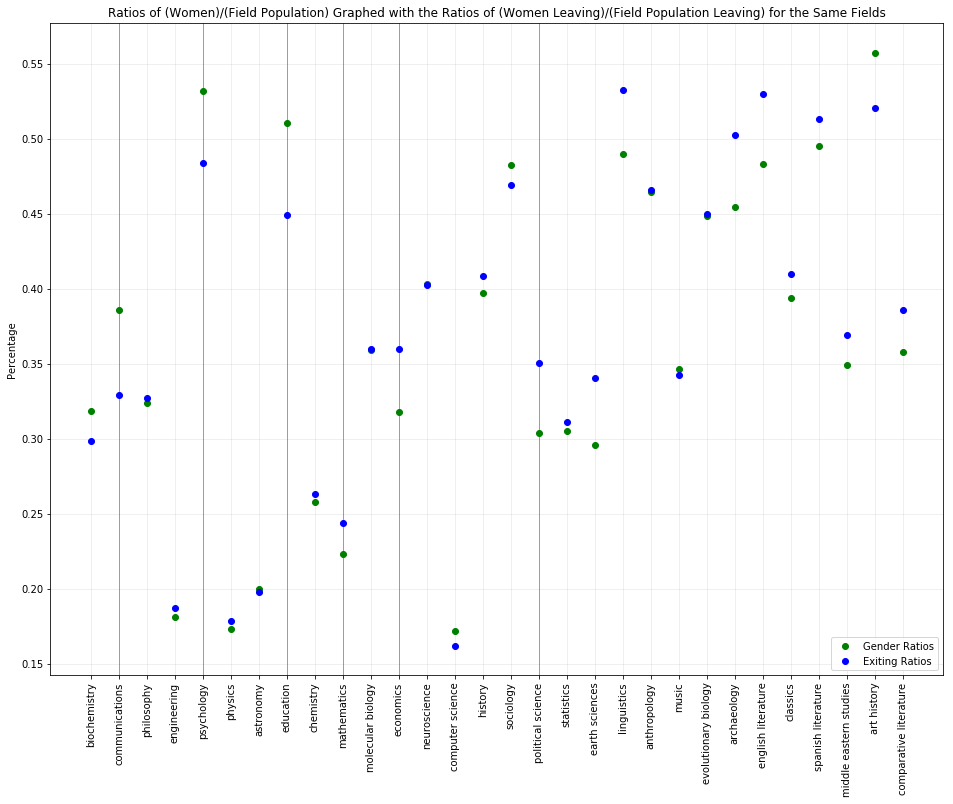

In [11]:
def two_b(z_alpha):
    gender_ratios, retention_ratios, gender_populations, retention_populations, fields = two_a(True, False)
    
    # Create Information Variables
    gender_variances = []
    retention_variances = []
    different = []
    good_bad = []
    
    # Calculate Z val once because it won't change from test to test
    z = norm.ppf(1-z_alpha/2)
    
    for i in range(len(fields)):
        
        # Pull information from arrays
        gender_mean = gender_ratios[i]
        gender_population = gender_populations[i]
        retention_mean = retention_ratios[i]
        retention_population = retention_populations[i]
        
        # Calculate Difference of Means for Comparison of Population Proportions
        difference_of_means = gender_mean-retention_mean
        
        # Calculate Standard Deviation for Comparison of Population Proportions
        std_deviation = np.sqrt(gender_mean*(1-gender_mean)/gender_population + retention_mean*(1-retention_mean)/retention_population)
        
        # Get lower bound of confidence interval
        lower_bound = difference_of_means - z*std_deviation
        
        # Get upper bound of confidence interval
        upper_bound = difference_of_means + z*std_deviation
        
        # Check to see if our confidence interval really matters (if it contains 0 they're not sufficiently different)
        if lower_bound <= 0 and upper_bound >= 0:
            different.append(0)
        else:
            different.append(1)
    
    # Do Graph Stuff  
    fig, ax = plt.subplots(figsize=(16,12))
    
    for x in range(len(different)):
        if different[x] == 1:
            ax.axvline(x+1, color="red", linewidth=0.5)
    
    ax.plot(range(1,31), gender_ratios, 'o', label="Gender Ratios", color="green")
    ax.plot(range(1,31), retention_ratios, 'o', label="Exiting Ratios", color="blue")

    ax.grid(alpha=0.25)
    plt.xticks(range(1,31), fields, rotation='vertical') # Change it so that labels are colored, not dots
    ax.set_axisbelow(True)
    ax.legend()
    ax.set_title("Ratios of (Women)/(Field Population) Graphed with the Ratios of (Women Leaving)/(Field Population Leaving) for the Same Fields")
    ax.set_ylabel("Percentage")
    plt.show()
    
two_b(.05)

**Part C**: Repeat the procedure from **Part B** at the $\alpha = 0.01$ level. 

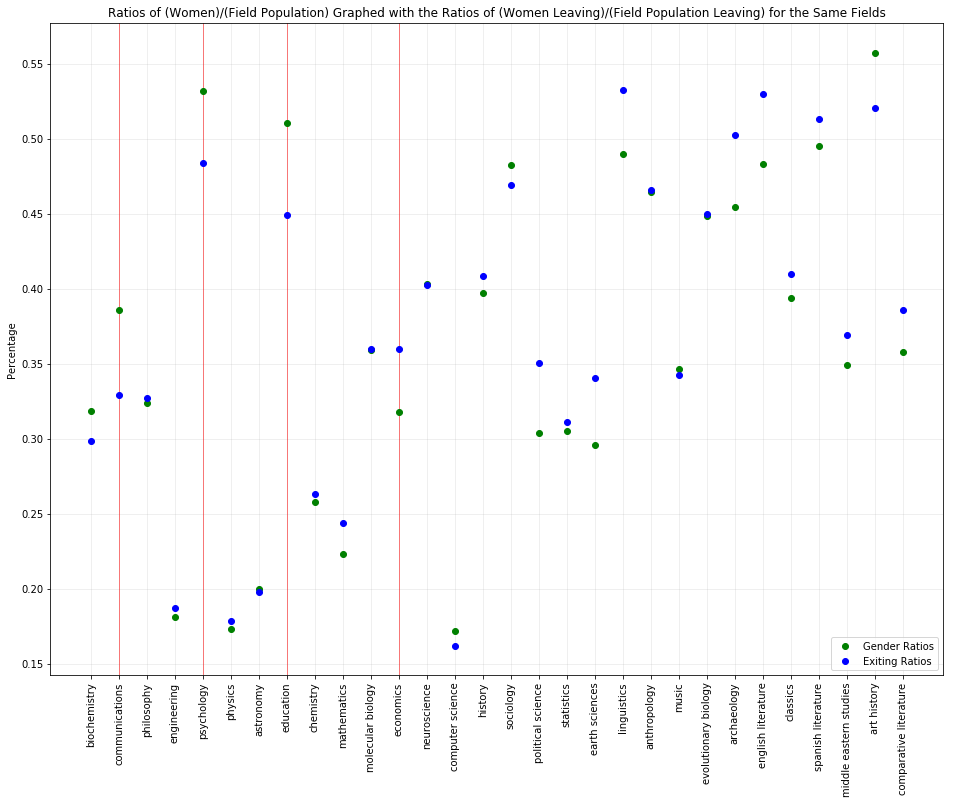

In [12]:
two_b(.01)